In [1]:
import numpy as np
from scipy import stats

import first_passage_percolation_sim as fpp

rng = np.random.default_rng(4)

# FirstPassagePercolation object

In [2]:
fpp_obj = fpp.FirstPassagePercolation(201, dist=stats.geom(0.5), rng=rng)
fpp_obj.graph


We need to compute the lengths to get any interesting information

In [3]:
fpp_obj.compute_lengths()  # can take some time, depending on the graph size
fpp_obj.grid_lengths

CenteredGrid([[215. 216. 214. ... 211. 215. 216.]
 [214. 212. 211. ... 210. 211. 214.]
 [214. 213. 212. ... 213. 212. 213.]
 ...
 [213. 212. 213. ... 217. 218. 219.]
 [214. 215. 214. ... 218. 219. 220.]
 [219. 217. 216. ... 220. 220. 223.]])

We can change the distribution of the weights without creating a new object. The distribution must be an instance of a class that only need to match the `Dist` protocol. Be aware that If we change things that will affect the length, we need to call the `compute_lengths` method to update the lengths. Otherwise an explicit error will be raised.

In [4]:
class CauchyPositive:
    def __init__(self, loc=0, scale=1):
        self.cauchy = stats.cauchy(loc=loc, scale=scale)

    def rvs(self, size=None, random_state=None) -> np.ndarray:
        return np.abs(self.cauchy.rvs(size, random_state=random_state))


fpp_obj.dist = CauchyPositive()
# fpp_obj.grid_lengths #! will raise an error, as the lengths are not computed yet
fpp_obj.compute_lengths()

FirstPassagePercolation(size_side=201, dist=<__main__.CauchyPositive object at 0x00000208BE7031D0>, rng=Generator(PCG64))

# Plots

## Heatmap

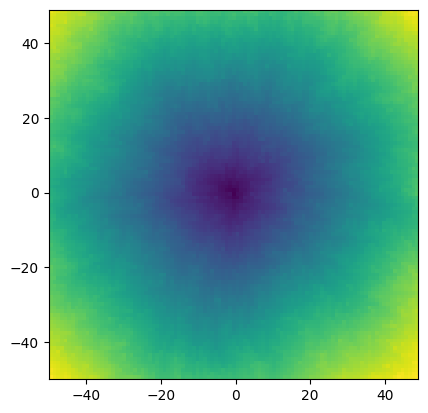

In [5]:
size = 101
fpp_obj = fpp.FirstPassagePercolation(size, dist=stats.geom(0.5), rng=rng).compute_lengths()

fpp_obj.plot_heatmap();

## Lengths

In each plot function, it is possible to pass an `ax` argument and any other keyword arguments that will be passed to the plot

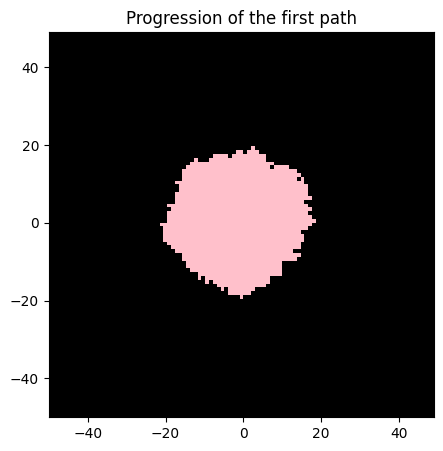

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Progression of the first path")
fpp_obj.plot_progression(t=30, axes=ax, colors=("black", "pink"), aspect="equal");

A more complete example of `plot_progression`:

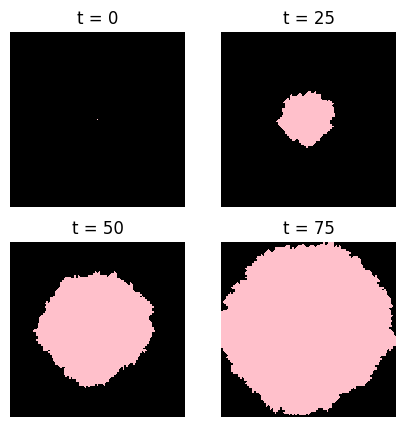

In [7]:
def custom(ax, t):
    ax.set_title(f"t = {int(t)}")
    ax.axis("off")


fig, axes = plt.subplots(2, 2, figsize=(5, 5))
t = np.linspace(0, 75, 4)
fpp_obj.plot_progression(t, axes, colors=("black", "pink"), customization=custom);


## Anything else

To plot anything that is not supported in any of the methods, just use the raw `grid_lengths` attribute

In [8]:
import plotly.express as px

X = np.arange(1, fpp_obj.grid_lengths.end_index + 1)
Y = fpp_obj.grid_lengths[0, X] / X
px.scatter(
    x=X,
    y=Y,
    title=r"Law of average for T",
    template="plotly_dark",
    labels={"x": "n", "y": "T(0, ne_1) / n"},
)

# Multiple simulations

## Generator

The package provide a way of generating multiple simulations that depend on a parameter. The parameter can be anything.

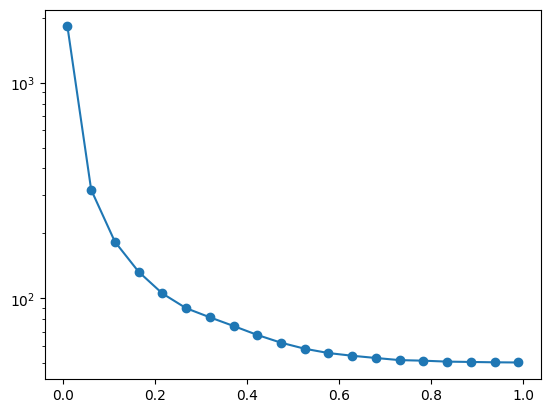

In [9]:
def dist_func(x) -> fpp.Dist:
    return stats.geom(x)


range_x = np.linspace(0.01, 0.99, 20)

lengths_generator = fpp.lengths_varying_param(dist_func, range_x, size_side=size, rng=rng)

# a simple example of use
means = [length.array.mean() for length in lengths_generator]
plt.plot(range_x, means, marker="o")
plt.yscale("log")

## Multiple plots

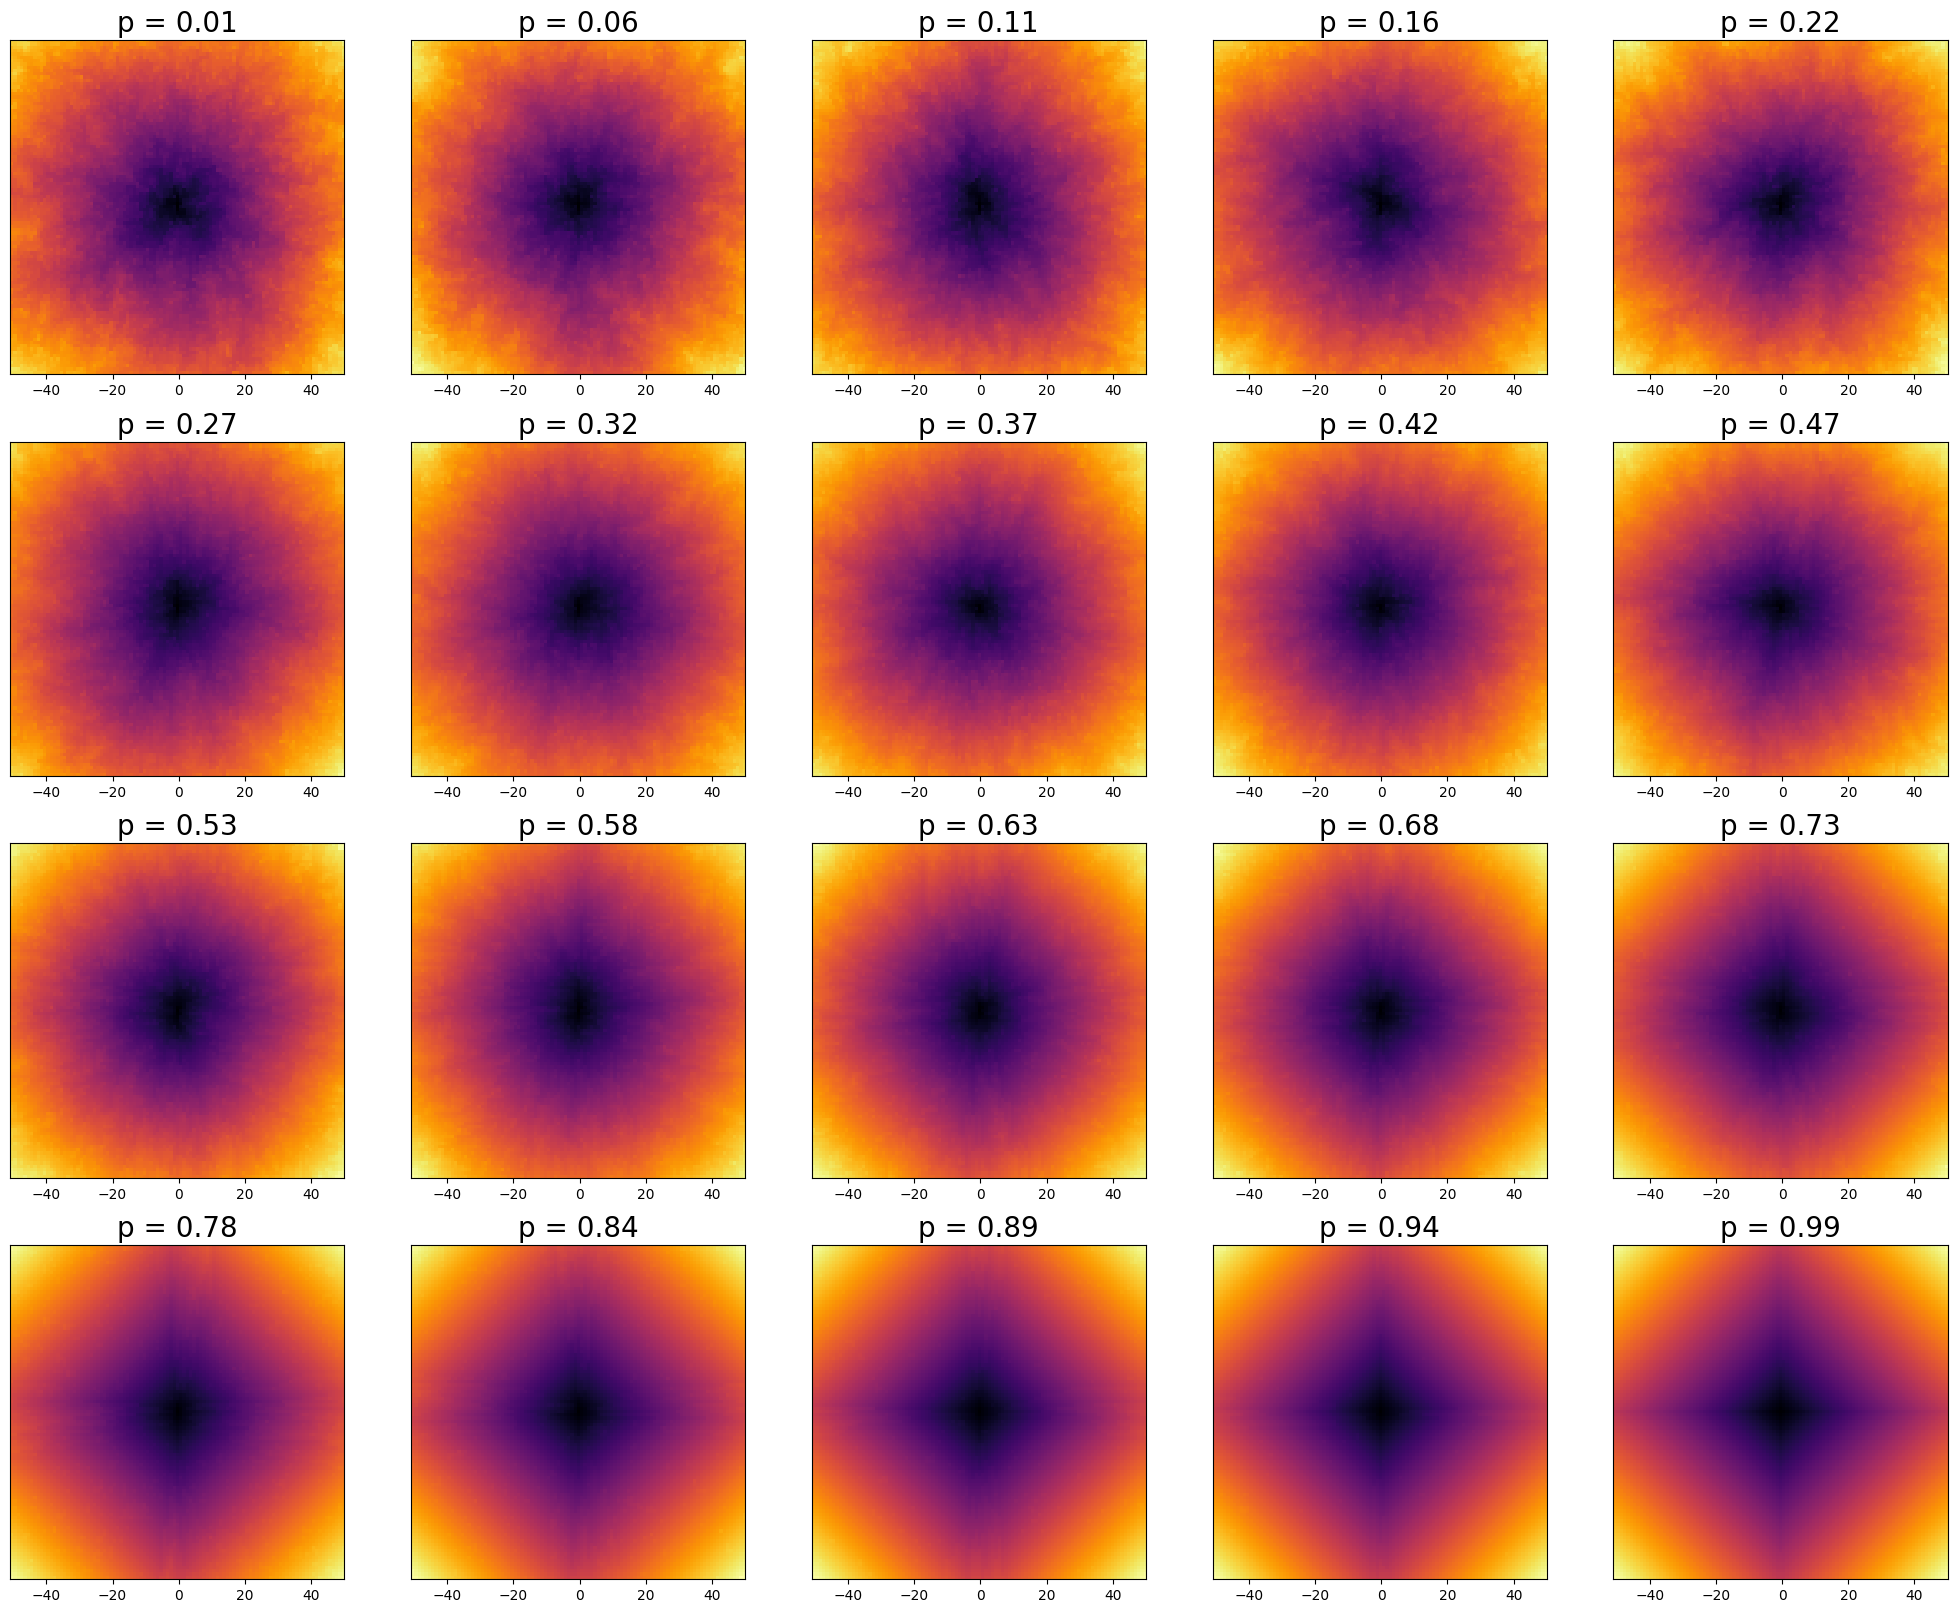

In [10]:
def custom_func(ax, p):
    ax.set_title(f"p = {p:.2f}", fontsize=20)
    ax.axes.get_yaxis().set_visible(False)


fpp.plot_lengths_varying_param(
    dist_func, range_x, size_side=size, rng=rng, custom_func=custom_func, nb_cols=5, cmap="inferno"
);
